# This python notebook is to assist my program developing process and save useful images and discussion for the writeup.

### Import packages

In [112]:
# Import useful packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import cv2
import math

### Load Driving_log data

In [113]:
# Set the driving_log.scv file path
csv_path = './Behavior_Cloning_Data/driving_log.csv'

# Use panda to read the csv file
data_record = pd.read_csv(csv_path, index_col = False)
data_record['direction'] = pd.Series('s', index = data_record.index)

# Show the columns of the data sheet
data_record.columns

Index(['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed',
       'direction'],
      dtype='object')

### Show the steer signal along frames in time sequence

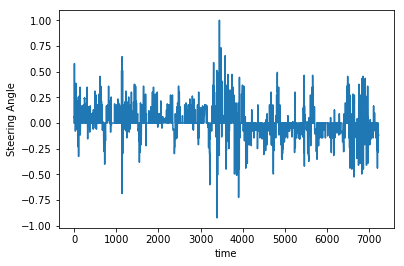

In [144]:
plot_len = 20000
data_steer = np.array(data_record.steering, dtype = np.float32)
time = np.arange(len(data_steer))
plt.plot(time[0:plot_len], data_steer[0:plot_len])
plt.xlabel('time')
plt.ylabel('Steering Angle')
# steer_sm = data_steer
# data_record['steer_sm'] = pd.Series(steer_sm, index=data_record.index)

From this chart, we can tell the vehicle is driving clockwise along the course since the steering angle has more positive than negative.  

### Show the speed log


index                                  center  \
0        50  IMG/center_2016_12_01_13_32_43_357.jpg   
1        51  IMG/center_2016_12_01_13_32_43_457.jpg   
2        52  IMG/center_2016_12_01_13_32_43_558.jpg   
3        53  IMG/center_2016_12_01_13_32_43_659.jpg   
4        54  IMG/center_2016_12_01_13_32_43_761.jpg   
5        55  IMG/center_2016_12_01_13_32_43_862.jpg   
6        56  IMG/center_2016_12_01_13_32_43_963.jpg   
7        57  IMG/center_2016_12_01_13_32_44_064.jpg   
8        58  IMG/center_2016_12_01_13_32_44_165.jpg   
9        59  IMG/center_2016_12_01_13_32_44_266.jpg   
10       60  IMG/center_2016_12_01_13_32_44_368.jpg   
11       61  IMG/center_2016_12_01_13_32_44_468.jpg   
12       62  IMG/center_2016_12_01_13_32_44_569.jpg   
13       63  IMG/center_2016_12_01_13_32_44_671.jpg   
14       64  IMG/center_2016_12_01_13_32_44_772.jpg   
15       65  IMG/center_2016_12_01_13_32_44_873.jpg   
16       66  IMG/center_2016_12_01_13_32_44_974.jpg   
17       67  IMG/center_2016_12_01_13_32_45_074.jpg   
18       68  IMG/center_2016_12_01_13_32_45_174.jpg   
19       69  IMG/center_2016_12_01_13_32_45_275.jpg   
20       70  IMG/center_2016_12_01_13_32_45_377.jpg   
21       71  IMG/center_2016_12_01_13_32_45_477.jpg   
22       72  IMG/center_2016_12_01_13_32_45_578.jpg   
23       73  IMG/center_2016_12_01_13_32_45_679.jpg   
24       74  IMG/center_2016_12_01_13_32_45_780.jpg   
25       75  IMG/center_2016_12_01_13_32_45_881.jpg   
26       76  IMG/center_2016_12_01_13_32_45_982.jpg   
27       77  IMG/center_2016_12_01_13_32_46_084.jpg   
28       78  IMG/center_2016_12_01_13_32_46_185.jpg   
29       79  IMG/center_2016_12_01_13_32_46_285.jpg   
...     ...                                     ...   
7192   7857  IMG/center_2016_12_01_13_46_23_702.jpg   
7193   7858  IMG/center_2016_12_01_13_46_23_803.jpg   
7194   7859  IMG/center_2016_12_01_13_46_23_907.jpg   
7195   7860  IMG/center_2016_12_01_13_46_24_009.jpg   
7196   7861  IMG/center_2016_12_01_13_46_24_110.jpg   
7197   7862  IMG/center_2016_12_01_13_46_24_211.jpg   
7198   7863  IMG/center_2016_12_01_13_46_24_313.jpg   
7199   7864  IMG/center_2016_12_01_13_46_24_415.jpg   
7200   7865  IMG/center_2016_12_01_13_46_24_515.jpg   
7201   7866  IMG/center_2016_12_01_13_46_24_618.jpg   
7202   7867  IMG/center_2016_12_01_13_46_24_718.jpg   
7203   7868  IMG/center_2016_12_01_13_46_24_821.jpg   
7204   7869  IMG/center_2016_12_01_13_46_24_923.jpg   
7205   7870  IMG/center_2016_12_01_13_46_25_025.jpg   
7206   7871  IMG/center_2016_12_01_13_46_25_128.jpg   
7207   7872  IMG/center_2016_12_01_13_46_25_229.jpg   
7208   7873  IMG/center_2016_12_01_13_46_25_330.jpg   
7209   7874  IMG/center_2016_12_01_13_46_25_430.jpg   
7210   7875  IMG/center_2016_12_01_13_46_25_532.jpg   
7211   7876  IMG/center_2016_12_01_13_46_25_635.jpg   
7212   7877  IMG/center_2016_12_01_13_46_25_735.jpg   
7213   7878  IMG/center_2016_12_01_13_46_25_837.jpg   
7214   7879  IMG/center_2016_12_01_13_46_25_940.jpg   
7215   7880  IMG/center_2016_12_01_13_46_26_040.jpg   
7216   7881  IMG/center_2016_12_01_13_46_26_141.jpg   
7217   7882  IMG/center_2016_12_01_13_46_26_244.jpg   
7218   7883  IMG/center_2016_12_01_13_46_26_346.jpg   
7219   7884  IMG/center_2016_12_01_13_46_26_449.jpg   
7220   7885  IMG/center_2016_12_01_13_46_26_550.jpg   
7221   7886  IMG/center_2016_12_01_13_46_26_651.jpg   

                                       left  \
0      IMG/left_2016_12_01_13_32_43_357.jpg   
1      IMG/left_2016_12_01_13_32_43_457.jpg   
2      IMG/left_2016_12_01_13_32_43_558.jpg   
3      IMG/left_2016_12_01_13_32_43_659.jpg   
4      IMG/left_2016_12_01_13_32_43_761.jpg   
5      IMG/left_2016_12_01_13_32_43_862.jpg   
6      IMG/left_2016_12_01_13_32_43_963.jpg   
7      IMG/left_2016_12_01_13_32_44_064.jpg   
8      IMG/left_2016_12_01_13_32_44_165.jpg   
9      IMG/left_2016_12_01_13_32_44_266.jpg   
10     IMG/left_2016_12_01_13_32_44_368.jpg   
11     IMG/left_2016_12_01_13_3

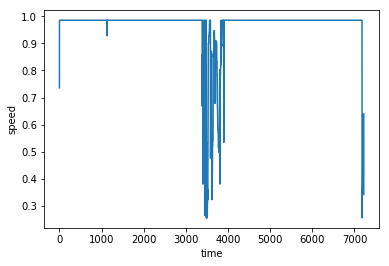

In [145]:
data_speed = np.array(data_record.throttle, dtype = np.float32)
plt.plot(time[0:plot_len], data_speed[0:plot_len])
plt.xlabel('time')
plt.ylabel('speed')
data_record

### Remove the throttle below 0.25 to exclude the initial, final, and some of the driving-straight state

In [116]:
ind_del = data_record['throttle'] > 0.25
data_record = data_record[ind_del].reset_index()

## Image preprocess

In [117]:
# Define a image function loading and normalizing the input image
def image_new_norm(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = img/255.0 - 0.5
    return img

### Image Augmentation 1: Including Left and Right images

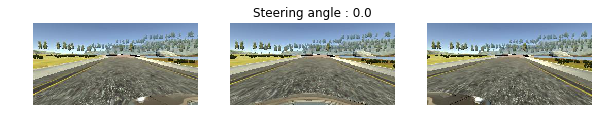

In [118]:
image_num = 16 # pick a random image
image_center = image_new_norm('Behavior_Cloning_Data/'+data_record['center'][image_num].strip())
image_left = image_new_norm('Behavior_Cloning_Data/'+data_record['left'][image_num].strip())
image_right = image_new_norm('Behavior_Cloning_Data/'+data_record['right'][image_num].strip())
plt.figure(figsize=(10, 6))
plt.subplot(1,3,1)
plt.imshow(image_left+.5);
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(image_center+.5);
plt.axis('off')
plt.title('Steering angle : '+ str(np.round(data_record['steering'][image_num]*25,2) ));
plt.subplot(1,3,3)
plt.imshow(image_right+.5);
plt.axis('off');

To use the left and right images, I shift the right  camera to the left by subtracting .25 and left camera to the right by adding .25. This shifting parameter is turned and tested in the training and validation step.

### Image Augmentation 2：Brightness augmentation

Thanks to the Vivek Yadav's post. I add this step to accomodate the model to both day and night driving environments, although it is not necessary to this project. I used the HSV scale and randomly adjusted the 'V' value by a scale from 0.2 to 1.2. The returning image is converted back to RGB.

In [140]:
def augment_brightness(image):
    imageHSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    random = 0.2 + np.random.uniform()
    imageHSV[:,:,2] = imageHSV[:,:,2] * random
    imageout = cv2.cvtColor(imageHSV, cv2.COLOR_HSV2RGB)
    return imageout

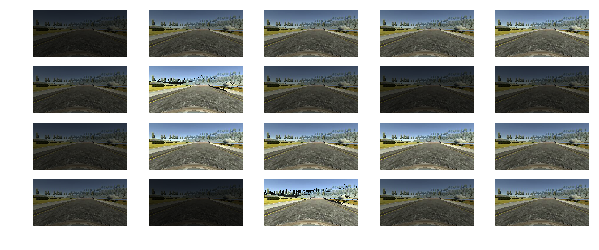

In [143]:
image2 = cv2.imread('Behavior_Cloning_Data/'+data_record['center'][1].strip())
image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,5))
for i in range(20):
    image1 = augment_brightness(image2)
    plt.subplot(5,5,i+1)
    plt.imshow(image1)
    plt.axis('off')

### Augmentation 3: Shifting left/right and up/down
Processed images from this augmentation method simulate the effect of the car at different positions in the lane.

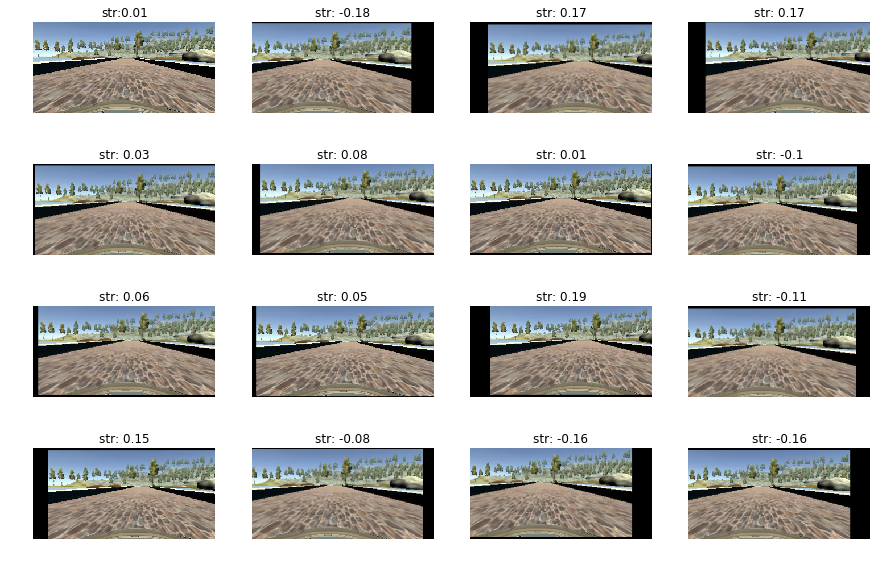

In [151]:
image = cv2.imread('Behavior_Cloning_Data/'+data_record['center'][80].strip())
steer = data_steer[80]
image_l = cv2.imread('Behavior_Cloning_Data/'+data_record['left'][80].strip())
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_l = cv2.cvtColor(image_l, cv2.COLOR_BGR2RGB)

# Translate the image 
def trans_image(image, steer, trans_range):
    trans_x = trans_range * np.random.uniform() - trans_range/2 # To get positive and negative shift
    steer_ang = steer + trans_x / trans_range * 2 * 0.2
    trans_y = 10 * np.random.uniform() - 10/2
    Trans_m = np.float32([[1,0,trans_x],[0,1,trans_y]])
    image_trans = cv2.warpAffine(image, Trans_m, (image.shape[1], image.shape[0]))
    
    return image_trans, steer_ang, trans_x
plt.figure(figsize = (15, 10))
plt.subplot(4,4,1)
plt.imshow(image)
plt.title('str:' + str(np.round(steer, 2)))
plt.axis('off')

for i in range(15):
    plt.subplot(4, 4, i+2)
    image_trans, steer_ang, trans_x = trans_image(image, steer, 80)
    plt.title('str: ' + str(np.round(steer_ang,2)))
    plt.imshow(image_trans)
    plt.axis('off');

### Augmentation 4: Flipping images
The output images from this augmentation method are flipped along the vertical axis to simulate the vehicle driving counterclockwise. The flipped images are chosen randomly. The corresponding steering angels are multiplied by -1 to make the vehicle steer to the opposite direction 

### The preprocess is implemented to all images